# Converting from JSON to CSV

In [ ]:
import json
import csv

with open("StreamingHistory0.json", encoding='utf8') as json_file:
    data = json.load(json_file)

with open('streaming_data.csv','w', encoding='utf8') as data_file:
    csv_writer = csv.writer(data_file)

    count = 0
    for d in data:
        if count == 0:
            header = d.keys()
            csv_writer.writerow(header)
            count += 1
        csv_writer.writerow(d.values())



# Reading CSV file and Date formating

In [1]:
import pandas as pd
import numpy as np

stream_data = pd.read_csv('streaming_data.csv')
stream_data['endTime'] = pd.to_datetime(stream_data['endTime'], format='%Y-%m-%d %H:%M')

# creating seperate columns for year, month and day
stream_data['year'] = pd.DatetimeIndex(stream_data['endTime']).year
stream_data['month'] = pd.DatetimeIndex(stream_data['endTime']).month
stream_data['day'] = pd.DatetimeIndex(stream_data['endTime']).day


# Most streamed artists analysis

## Extracting stream counts for most streamed artists for each month

In [2]:
streams = {1:[], 2:[], 3:[], 4:[], 5:[]}


for i in range(2,13):
    result  = stream_data.loc[(stream_data.month==i) & (stream_data.year==2021),['artistName']].value_counts()[:5]
    for j in range(5):
        streams[j+1].append([result.index[j][0],result.values[j]])
    
result = stream_data.loc[(stream_data.month==1) & (stream_data.year==2022),['artistName']].value_counts()[:5]
for j in range(5):
        streams[j+1].append([result.index[j][0],result.values[j]])


The following plot shows the 2 most streamed artists within a year from Feb 2021 to Jan 2022. 

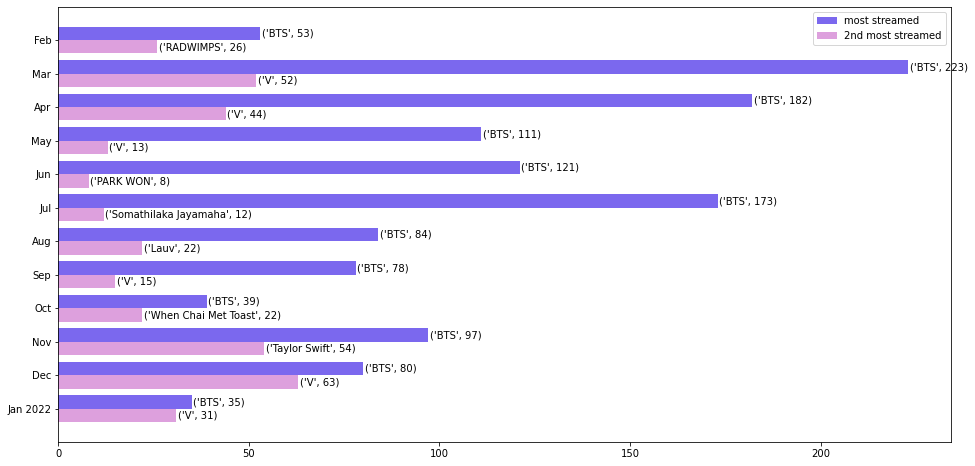

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))

months =['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan 2022']

X_axis = np.arange(1,len(streams[1])+1)
p1 = ax.barh(X_axis-0.2,[i[1] for i in streams[1]], 0.4, label="most streamed", color='mediumslateblue')
p2 = ax.barh(X_axis+0.2,[i[1] for i in streams[2]], 0.4, label="2nd most streamed", color='plum')

ax.invert_yaxis()
ax.bar_label(p1, labels=[(i[0],i[1]) for i in streams[1]], padding=1.5)
ax.bar_label(p2, labels=[(i[0],i[1]) for i in streams[2]], padding=1.5)

plt.yticks(X_axis, months)
plt.legend()
plt.show()

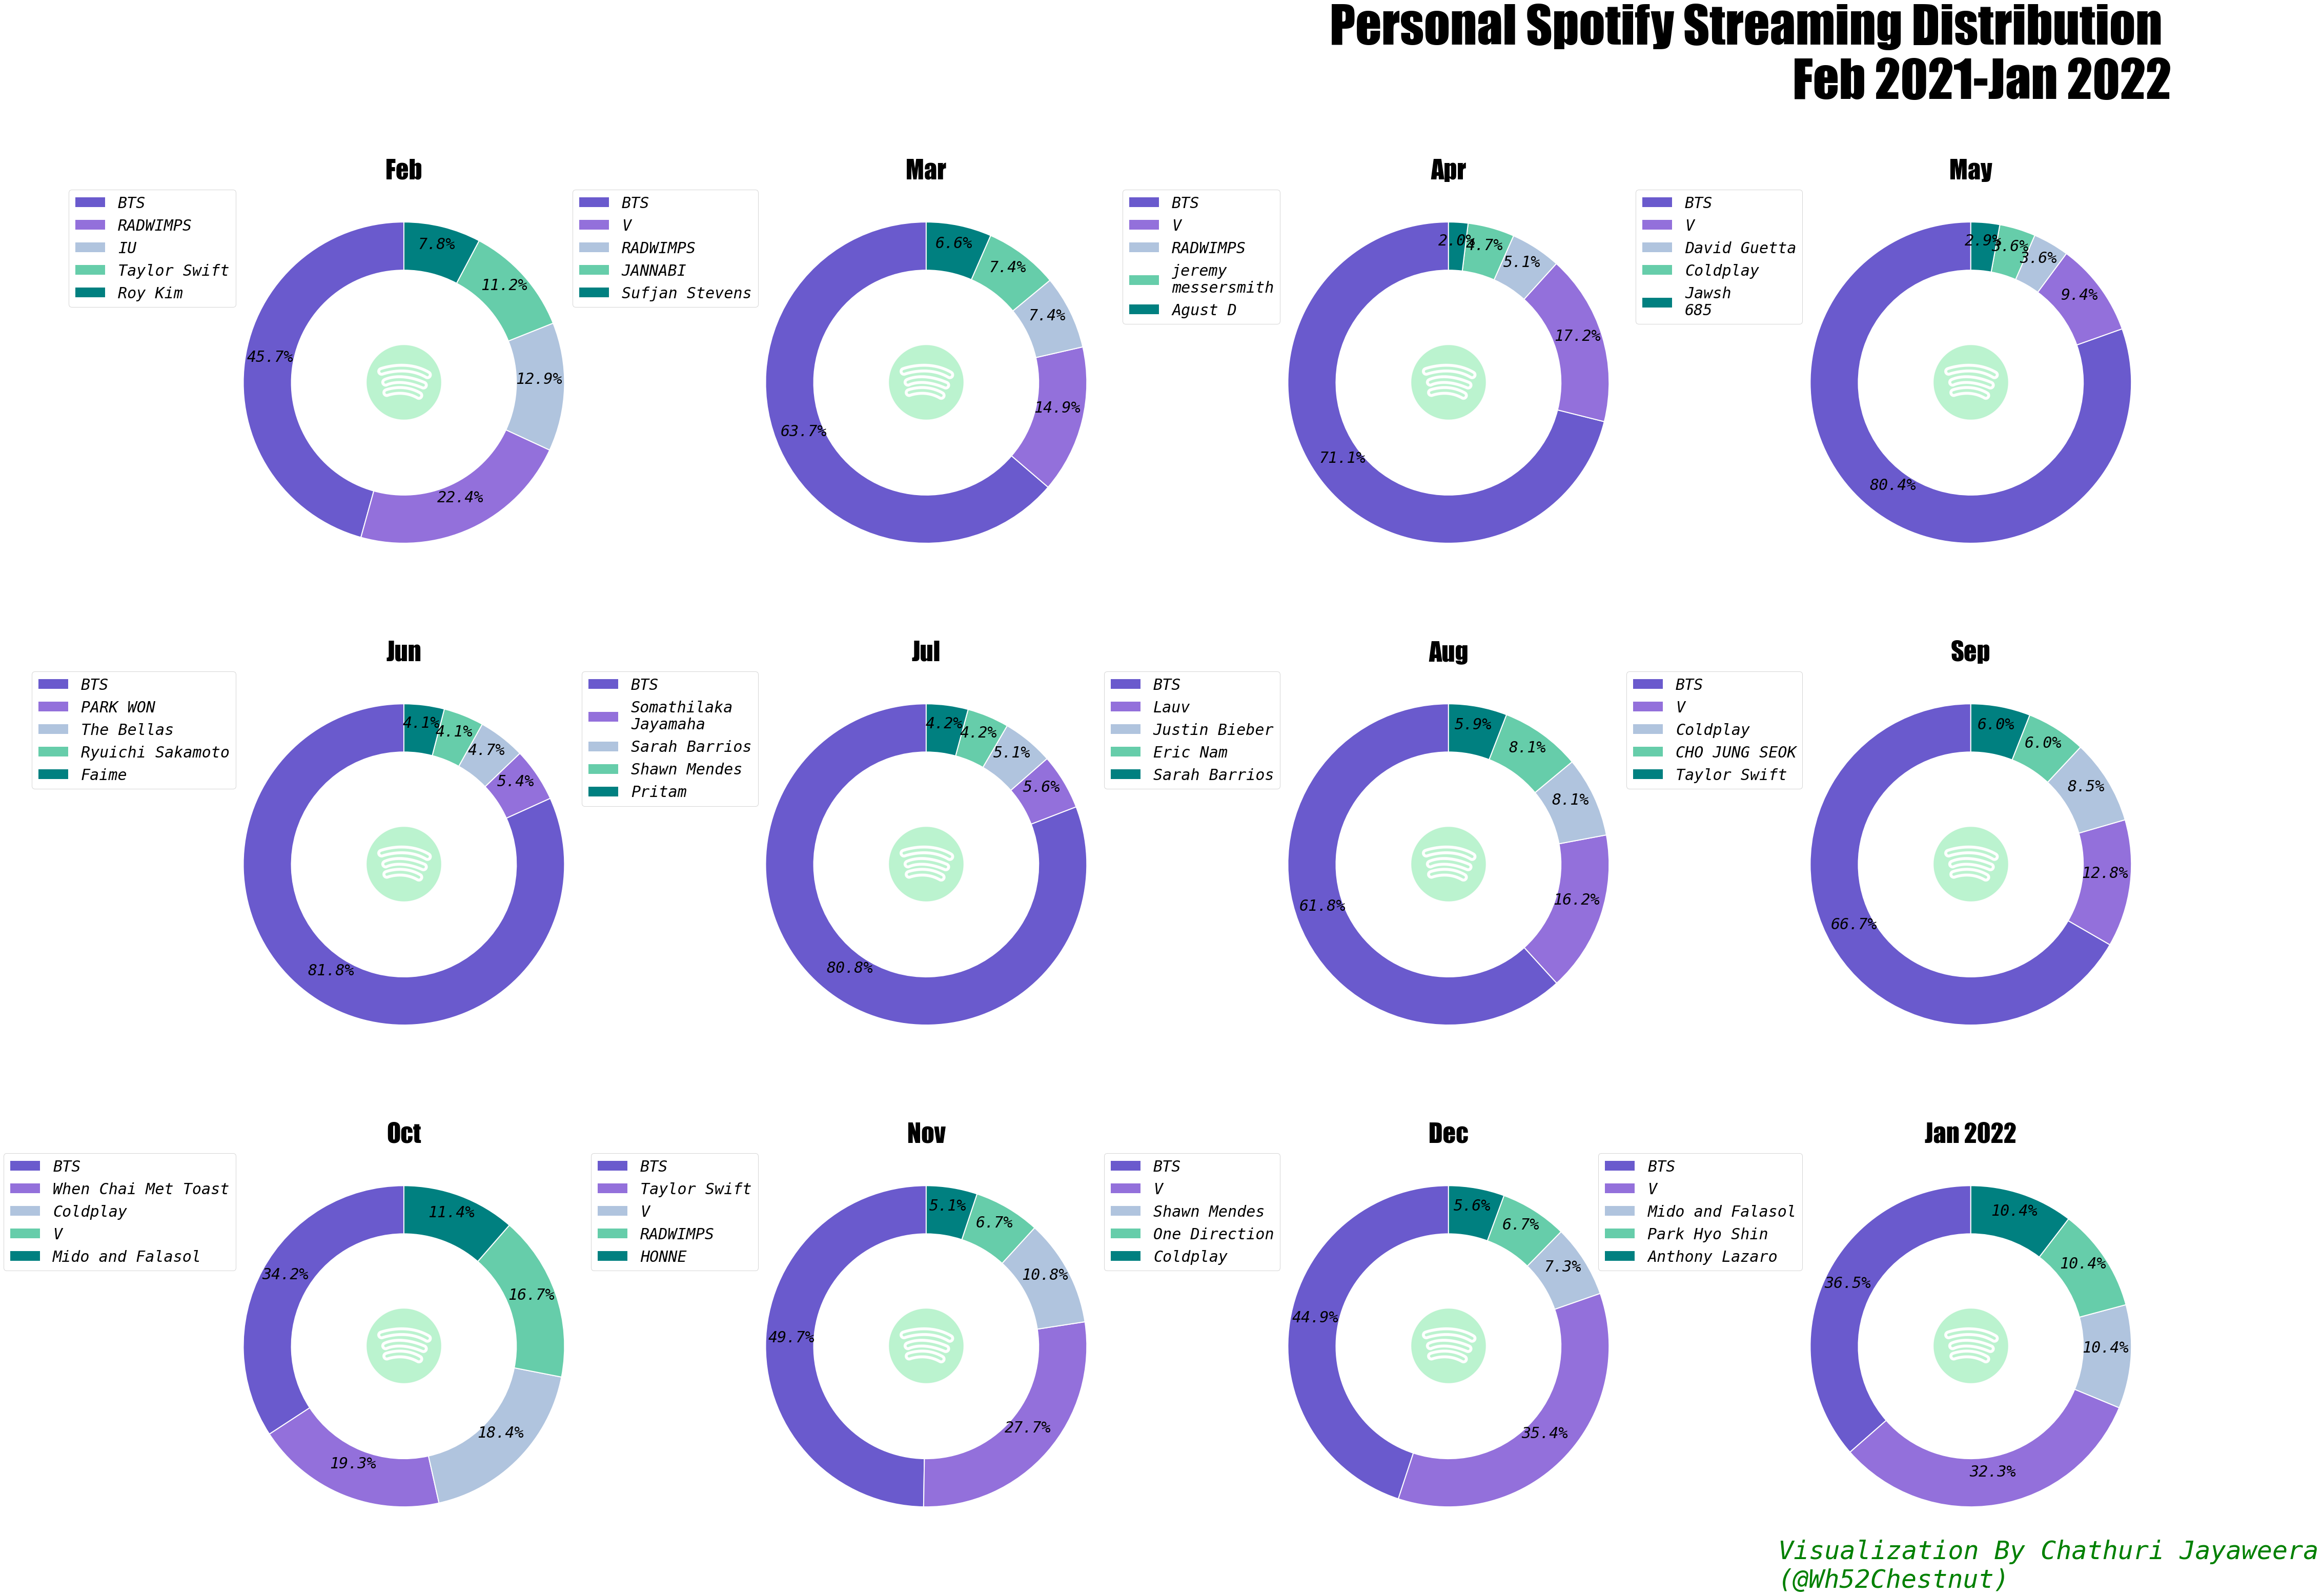

In [176]:
fig, ax = plt.subplots(3,4,figsize=(70,49))

# subplot and text config
wedgeprops = {'width':0.3, 'edgecolor':'white', 'linewidth':2}
colors = ['slateblue', 'mediumpurple', 'lightsteelblue', 'mediumaquamarine', 'teal']
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.weight'] = 'normal'


plt.title('Personal Spotify Streaming Distribution \nFeb 2021-Jan 2022', fontsize=100, y=3.6, loc='right', fontfamily='fantasy')

img = plt.imread('spotify-logo.png')

for i in range(3):
    for j in range(4):
        labs = ['\n'.join(streams[k+1][4*i+j][0].split()) if (streams[k+1][4*i+j][0] in ['jeremy messersmith','Jawsh 685','Somathilaka Jayamaha']) else streams[k+1][4*i+j][0] for k in range(5)]
        data = [streams[k+1][4*i+j][1] for k in range(5)]
        ax[i,j].imshow(img, extent=[-0.5, 0.5, -0.5, 0.5], alpha=0.3)
        ax[i,j].pie(data,
                    wedgeprops=wedgeprops, 
                    startangle=90,
                    colors=colors,
                    autopct='%1.1f%%',
                    pctdistance=0.84,
                    labeldistance=1.05,
                    textprops={'va':'bottom'})
        ax[i,j].set_title(months[4*i+j], fontsize=50, fontfamily='fantasy')
        ax[i,j].legend(labs,loc='best', bbox_to_anchor=(0.1,1))
        





plt.text(-1.2, -1.5, "Visualization By Chathuri Jayaweera\n(@Wh52Chestnut)", fontsize=50, color='green')
fig.savefig('Yearly_personal_stream_dist.jpg')
plt.show()

# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

In [ ]:
from math import pi
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots(3,4,figsize=(100,70), subplot_kw={'projection':'polar'})

# subplot and text config
wedgeprops = {'width':0.3, 'edgecolor':'white', 'linewidth':2}
colors = ['slateblue', 'mediumpurple', 'lightsteelblue', 'mediumaquamarine', 'teal']
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.weight'] = 'normal'


plt.title('Personal Spotify Streaming Distribution \nFeb 2021-Jan 2022', fontsize=100, y=3.6, loc='right', fontfamily='fantasy')

img = plt.imread('spotify-logo.png')

for i in range(3):
    for j in range(4):
        labs = [streams[k+1][4*i+j][0] for k in range(5)]
        ys = [-1.4,-0.2,1,2.2,3.4]
        stream_sum = np.sum(np.array([streams[k+1][4*i+j][1] for k in range(5)]))
        data = [(streams[k+1][4*i+j][1]*pi*2)/stream_sum for k in range(4,-1,-1)]
        left = (90*pi*2)/360
        ax[i,j].barh(ys, data, height=1, color=colors)
        # ax[i,j].imshow(img, extent=[-0.5, 0.5, -0.5, 0.5], alpha=0.3)
        
        ax[i,j].set_title(months[4*i+j], fontsize=25)
        plt.ylim(-4,4)
        ax[i,j].spines.clear()
        





plt.text(-1.2, -1.5, "Visualization By Chathuri Jayaweera\n(@Wh52Chestnut)", fontsize=25, color='green')
fig.savefig('Yearly_personal_stream_dist.jpg')
plt.show()

